<font size=7 face="courier">Experiment Source Code

This is the code used to create the diagrams in the notebook, `Experiment_Introduction.ipynb`.

# Set Up Notebook

import stuff

In [1]:
#!pip install powerlaw
# !pip install smart_open
# !pip install awswrangler
# !pip install deprecated
# !pip install nptyping

Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import braingeneers
from braingeneers.analysis.analysis import SpikeData, read_phy_files
import braingeneers.data.datasets_electrophysiology as ephys
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
import glob
import pandas as pd

Load Data

In [3]:
braingeneers.set_default_endpoint("./data")
files = glob.glob('./data/ephys/2022-04-28-e-/derived/kilosort2/*')
print('Loading', files[0])
sd = read_phy_files(files[0])
metadata = ephys.load_metadata('2022-04-28-e-')

Loading ./data/ephys/2022-04-28-e-/derived/kilosort2/Trace_20220428_15_52_47_chip11350_curated.zip


# MEA 2D Grid

Get 2D layout of all electrodes

In [5]:
electrode_mapping = metadata['ephys_experiments']['Trace_20220428_15_52_47_chip11350']['mapping']
electrode_mapping = pd.DataFrame(electrode_mapping, columns=['channel','electrode','x','y'])

<font color="blue">electrode_layout</font> plots the placement of all the recording electrodes

In [6]:
def electrode_layout():
    x = electrode_mapping.x.values
    y = electrode_mapping.y.values

    plt.scatter(x,y,s=2)
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("electrode layout")
    plt.show()

In [ ]:
#electrode_layout()

In [7]:
x = sd.neuron_data[0].keys()
x

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112])

In [9]:
print(sd.neuron_data[0].keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112])


In [10]:
sd.__dict__.keys()
print('These are the extra things we have about ')
neuron_ind = 0
print(sd.neuron_data[0][neuron_ind].keys())
      
# Iterate over neuron data
for neuron in sd.neuron_data[0].values():
#     print(neuron)
    print("x,y:",neuron['position'])
    break

These are the extra things we have about 
dict_keys(['channel', 'position', 'amplitudes', 'template', 'neighbor_channels', 'neighbor_positions', 'neighbor_templates'])
x,y: (1050.0, 1260.0)


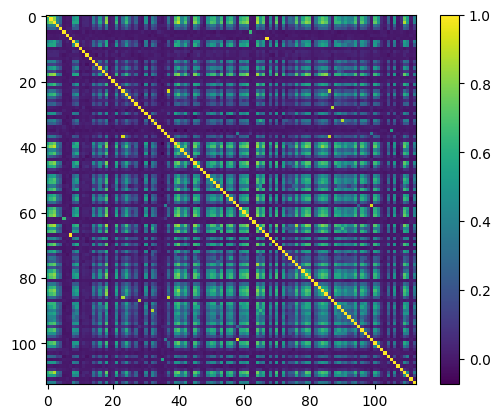

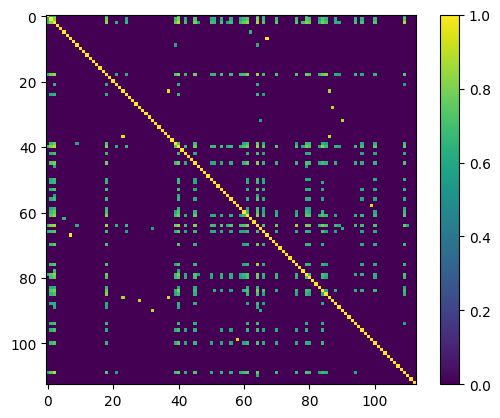

In [15]:
# Build this up more, lets add lines representing the spike time tiling
sttc = sd.spike_time_tilings()

# First lets peek the heatmap again
plt.imshow(sttc)
plt.colorbar()
plt.show()

# Cool, looks pretty correlated, lets figure out what threshold/thickness we want the lines to appear at

thresh = .6 #good enough?
sttc[sttc<thresh] = 0
plt.imshow(sttc,vmin=0,vmax=1)
plt.colorbar()
plt.show()

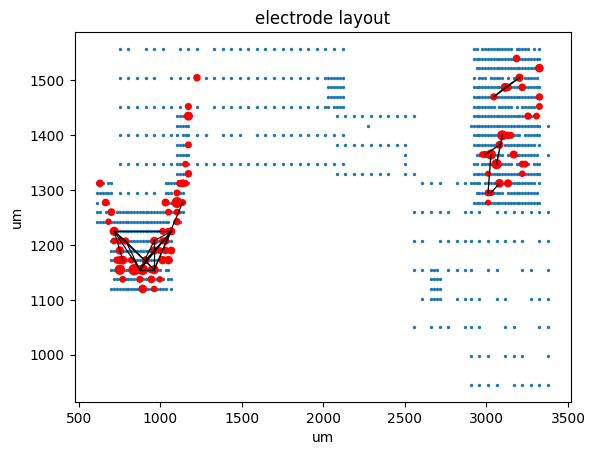

In [17]:
# Lets bring back our graph, and overlay these as connectivity lines
sttc = sd.spike_time_tilings()
thresh = .8
# electrodes
plt.scatter(x,y,s=2)
# Neurons
plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')

# Now lines for each neuron if above thresh
for i in range(sttc.shape[0]):
    for j in range(sttc.shape[1]):
        
        # Only need to do upper triangle since sttc' = sttc
        if i<=j: continue
            
        if sttc[i,j] < thresh: continue
            
        #Position of neuron i
        ix,iy = sd.neuron_data[0][i]['position']
        jx,jy = sd.neuron_data[0][j]['position']
        
        # Plot line between the points, linewidth is the sttc
        plt.plot([ix,jx],[iy,jy], linewidth=sttc[i,j],c='k')
        


plt.xlabel('um')
plt.ylabel('um')
plt.title("electrode layout")
plt.show()

# Latencies

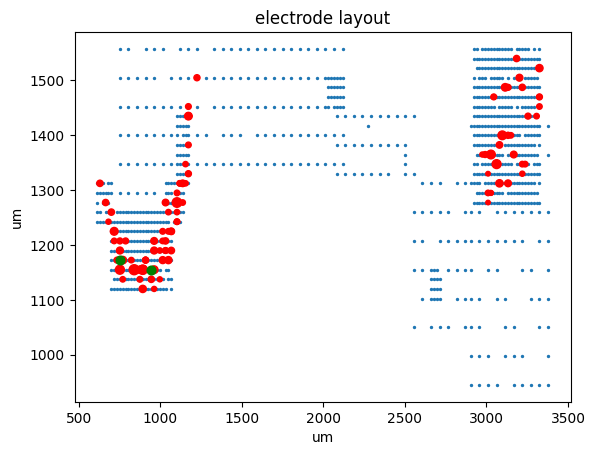

In [86]:
# Lets plot the amplitude of each identified neuron

# First plot the electrodes

x = electrode_mapping.x.values
y = electrode_mapping.y.values

plt.scatter(x,y,s=2)

neuron_x = []
neuron_y = []
neuron_amp = []
for neuron in sd.neuron_data[0].values():
#     print("x,y:",neuron['position'])
    neuron_x.append(neuron['position'][0])
    
    neuron_y.append(neuron['position'][1])
    neuron_amp.append(np.mean(neuron['amplitudes']))
    
# 
plt.scatter(neuron_x,neuron_y,s=neuron_amp,c='r')
plt.scatter([neuron_x[4]],[neuron_y[4]],s=[neuron_amp[7]],c='g')
plt.scatter([neuron_x[3]],[neuron_y[3]],s=[neuron_amp[7]],c='g')

plt.xlabel('um')
plt.ylabel('um')
plt.title("electrode layout")
plt.show()

In [82]:
lats = sd.latencies_to_index(0)



In [83]:
len(lats[3])

1141

(-25.0, 25.0)

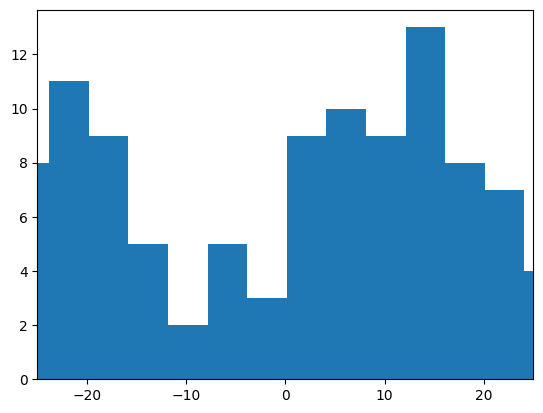

In [85]:
# print(lats[1])
_ = plt.hist(lats[67],bins=50)
plt.xlim([-25,25])

# Stimulation

In [113]:
def stimBasicPulse():

    # we want to build a square wave, where it is positive first, then negative, lets 
    def insert_square_wave(sig,time):
        '''Deflects positively at *time* for 20 samples (1ms) then deflects negatively for 20 samples, 
        then returns to normal'''
        sig[time:time+20] = 150
        sig[time+20:time+40] = -150
        return sig
    t = np.arange(0,fs*60)/fs
    sig = np.zeros_like(t)
    sig2 = insert_square_wave(sig,1*fs) #insert it 1s in

    plt.plot(t,sig2)
    plt.xlim([.995,1.005])# 200ms around the time we inserted
    plt.xlabel('seconds')
    plt.ylabel('Voltage (mv)')
    plt.show()

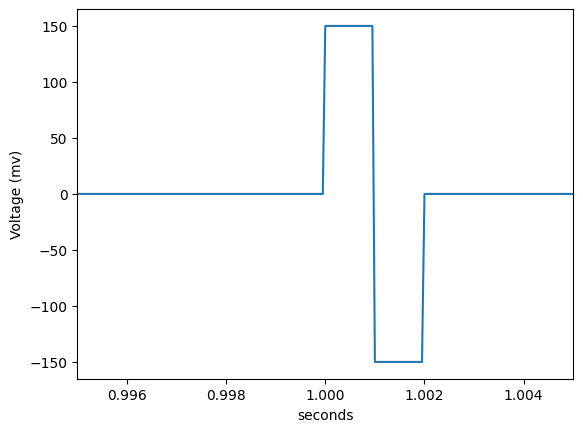

In [114]:
stimBasicPulse()

In [104]:
def examplePulse():
    time = np.arange(0,fs*60)/fs
    sig = np.zeros_like(time)

    sig[time:time+20] = 150
    sig[time+20:time+40] = -150

    plt.plot(time,sig)
    plt.xlim([.99,1.01])# 200ms around the time we inserted
    plt.xlabel('seconds')
    plt.ylabel('amplitude')
    plt.show()

In [105]:
examplePulse()

TypeError: only integer scalar arrays can be converted to a scalar index

Shape of t (1200000,)
Shape of sig (1200000,)


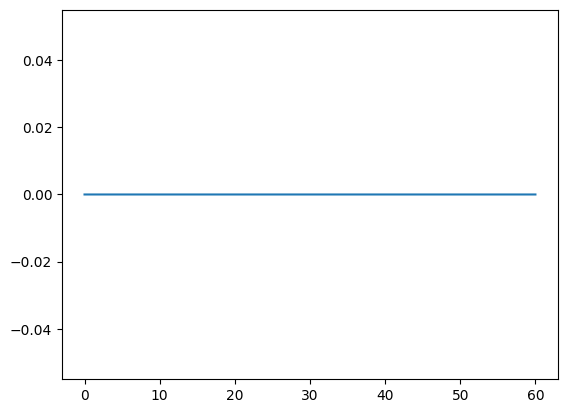

In [87]:
# Generate a stimulation waveform

fs = 20000 # samples per second

t = np.arange(0,fs*60)/fs
print('Shape of t', t.shape)

# Imagine we have zero signal, same shape as t
sig = np.zeros_like(t)
print('Shape of sig', sig.shape)

plt.plot(t,sig) # this is boring, but we will build
plt.show()



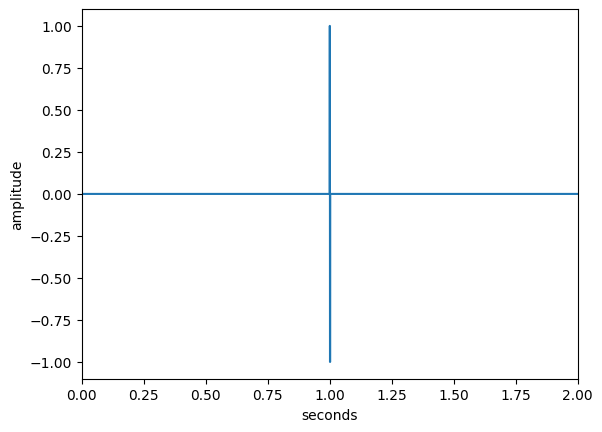

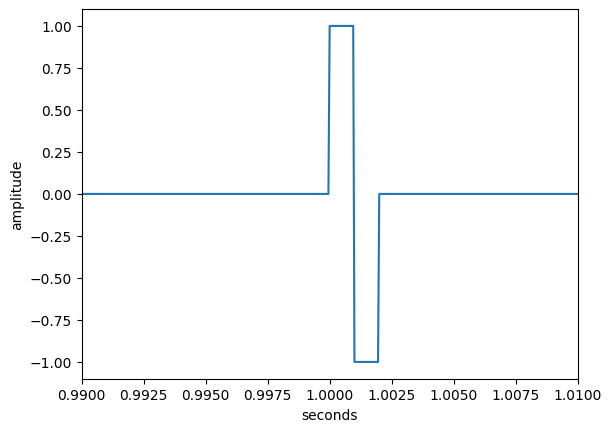

In [106]:
# Now we want to build a square wave, where it is positive first, then negative, lets 
# make a function that does that starting at a specific timepoint in t

def insert_square_wave(sig,time):
    '''Deflects positively at *time* for 20 samples (1ms) then deflects negatively for 20 samples, 
    then returns to normal'''
    sig[time:time+20] = 1
    sig[time+20:time+40] = -1
    return sig

t = np.arange(0,fs*60)/fs
sig = np.zeros_like(t)

sig2 = insert_square_wave(sig,1*fs) #insert it 1s in

plt.plot(t,sig2)
plt.xlim([0,2])
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.show()

# Well we may need to zoom more, remember this is *tiny*, we are in the milliseconds here

plt.plot(t,sig2)
plt.xlim([.99,1.01])# 200ms around the time we inserted
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.show()

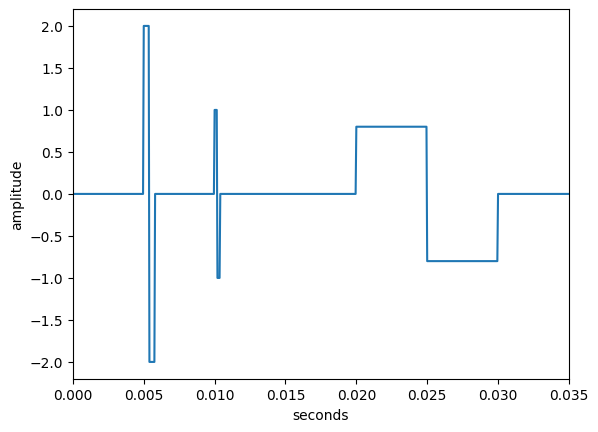

In [89]:
# Ok that looks good. Well, we should modify the function so we can change the duty cycle (length of the phases)
# Also we want to scale this!

def insert_square_wave_advanced(sig,time,phase_length=20, amplitude=1):
    '''Deflects positively at *time* for 20 samples (1ms) then deflects negatively for 20 samples, 
    then returns to normal'''
    sig[time:time+phase_length] = amplitude
    sig[time+phase_length:time+phase_length*2] = -amplitude
    return sig

# Ok looking better


t = np.arange(0,fs*1)/fs #We do 1 second this time :shrug:
sig = np.zeros_like(t)

sig2 = insert_square_wave_advanced(sig,100,phase_length=8, amplitude=2) #insert it 1s in
sig2 = insert_square_wave_advanced(sig2,200,phase_length=4, amplitude=1)
sig2 = insert_square_wave_advanced(sig2,400,phase_length=100, amplitude=.8)

# Well we may need to zoom more, remember this is *tiny*, we are in the milliseconds here

plt.plot(t,sig2)
plt.xlim([0,.035])# 200ms around the time we inserted
plt.xlabel('seconds')
plt.ylabel('amplitude')
plt.show()

In [90]:
# Looks good again.
# Well this is how we are going to build stimulation for neural units
# Ash has parsed the literature and tried experiments, and we've settled on voltages aroung 150-200mv 
# Which can evoke neural spikes

# Unless you are doing closed loop experiments (outside of the scope of this, talk to Ash)
# we can create stimulation patterns to stimulate at fixed (or probablistic) intervals!

# First lets see what it looks like if our previous pattern occurs at a fixed frequency

t = np.arange(0,fs*3)/fs #We do 3 second this time
sig = np.zeros_like(t)
freq_Hz = 5 # 5 times per second

for time in t[::fs//freq_Hz]: #This iterates at the proper frequency, don't worry about it!
    
    print('Occuring at', time, 'seconds')
    



Occuring at 0.0 seconds
Occuring at 0.2 seconds
Occuring at 0.4 seconds
Occuring at 0.6 seconds
Occuring at 0.8 seconds
Occuring at 1.0 seconds
Occuring at 1.2 seconds
Occuring at 1.4 seconds
Occuring at 1.6 seconds
Occuring at 1.8 seconds
Occuring at 2.0 seconds
Occuring at 2.2 seconds
Occuring at 2.4 seconds
Occuring at 2.6 seconds
Occuring at 2.8 seconds


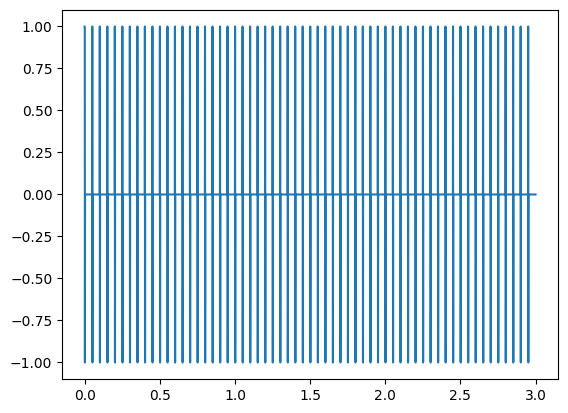

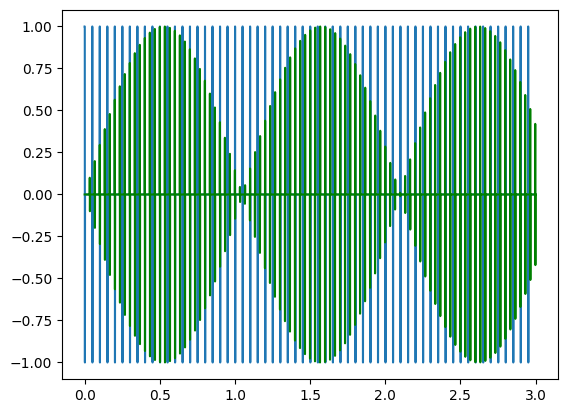

In [91]:
t = np.arange(0,fs*3)/fs #We do 3 second this time
sig = np.zeros_like(t)
sig2 = np.zeros_like(t)
freq_Hz = 20 # 20 times per second

for time in t[::fs//freq_Hz]: #This iterates at the proper frequency, don't worry about it!
    # Oops, we have to go from time in seconds to time in frames
    time_frames = int(time*fs) # We have to index with integers
    
    sig=insert_square_wave_advanced(sig,time_frames)
    
# What do we expect? Hopefully we have 20 squarewaves per second!
plt.plot(t,sig)
plt.show()
    
    
# MORE, lets change the amplitude as it goes, and the frequency!
freq_Hz = 30 # 20 times per second
for time in t[::fs//freq_Hz]: #This iterates at the proper frequency, don't worry about it!
    # Oops, we have to go from time in seconds to time in frames
    time_frames = int(time*fs) # We have to index with integers
    
    sig2=insert_square_wave_advanced(sig2,time_frames,amplitude = np.sin(time*3))
    
# What do we expect? Hopefully we have 20 squarewaves per second!
plt.plot(t,sig)
plt.plot(t,sig2,'g')
plt.show() # Pretty, you can see the aliasing!
    

In [ ]:
# Well, you ask, how does this allow me to stimulate an organoid?

# So hear me out-----
# The maxwell array has 24k+ electrodes!
# We can only record from ~1024
# And stimulate from 32
# However you will only be stimulating from less than 5 electrodes, which we will
# Identify to you as Neurons [0,1,2,3,4]

# Above we played with making waveforms, this new method will be very similar,
# Although it will be able to send the signal to the Maxwell device directly

# There are digital to Analogue converters (DAC)s on this device that can
# Convert signals similar to the one you created into a voltage waveform

# However there is only one that you will be using!

# WAIT, you say, how can we think about stimulating multiple neurons then?

# Well, that's a good question, and thus we have to have a clever solution
# What we'll do is power on/off the stimulation electrodes extremely rapidly
# and with this we can make anything 
# (as long as you don't want 2 different waveforms simultaneously)

# Lets take a look at how this works


In [ ]:
# We can do this a few ways

# ------- FreqEnv
# If we want to use the "FreqEnv" we will send in either a stimulation sequence,
# or a list of stimulation sequences. If it is one sequence, the environment will
# stimulate that pattern at the requested frequency

# If we send in a frequency and a list of sequences, the sequences will be stimulated
# In order or randomly (if using the "random" param)

# One thing to note is that --- max_time <= len(stim_seqs)*freq
# Or in english, you need to have enough stimulations to last the whole time
# -- or else no stimulations will occur

#-------- OtherEnv ------
# To be added




In [136]:
# How to define a sequence
# --Warning, the length of the sequence should not be longer than the period
# What this means, if you are trying to stimulation 10 times per second (10Hz)
# You cannot create a stimulation pattern that is 1 second long 


# We will be using different code, but the logic is the same



# For 'stim' command:
# ('stim', [neuron inds], amplitude, frames per phase)
# Phase is half a period, 1 frame is 50us

# For 'delay'
# ('delay', frames_delay)
# 1 frames_delay is 50us
# 20 frames_delay is 1ms

# For 'next'
# ('next', None)
# This command acts as a placeholder to move to the next timepoint in the time_arr or the next
# period triggered by the freq_Hz


# Assume we want this pattern
# neuron 0, 150mv, 200us per phase
# 5ms delay
# neuron 1,2, 200mv, 200us per phase
# 20ms delay
# neurons 0-4, 150mv, 200us per phase
# 10ms delay
# Repeat 10 times

stim_list = []
fs_ms = 20 # Good for converting frames to ms
fs_us = .2

seq = ('stim',[0],150,int(200*fs_us)) # Its weird this is in frames, how can this be more human readable
stim_list.append(seq)
seq = ('delay',fs_ms*5)
stim_list.append(seq)

seq = ('stim',[1],200,4)
stim_list.append(seq)
seq = ('delay',fs_ms*20)
stim_list.append(seq)

seq = ('stim',[0,1,2],150,4)
stim_list.append(seq)
seq = ('delay',fs_ms*20)
stim_list.append(seq)

seq = ('next',None)
stim_list.append(seq)

stim_list=stim_list*10 # repeat

# for s in stim_list:
#     print(s)





def _create_stim_pulse_sequence(stim_list, freq_Hz=None, time_arr = None,max_time_s = 1):
    """
    Creates a stim pulse sequence, parallels the real code that will run on the Maxwell
    
    Params:
    stim_list - list of tuples indicating the commands to run
            ------------------------------------------------
            For 'stim' command:
            ('stim', [neuron inds], mv, us per phase)

            For 'delay'
            ('delay', frames_delay)
            
            For 'next'
            ('next', None)
            This command acts as a placeholder to move to the next timepoint in the time_arr or the next
            period triggered by the freq_Hz
            -------------------------------------------------
    freq_Hz - frequency to call the top stim_list in
            *Note* this takes priority over time_arr
    time_arr - array of time values that will be when the stimulations occur in order
    
    max_time_s - time in seconds to stimulate
    
    
    Returns:
    sig - np.array -- shape=(n_neurons, timesteps) of what the signal will look like
    t - np.array   -- shape=(timesteps) of time in seconds
    """
    
    # Since this is fake, only parallels the code on the device,
    # We have to make our own time
    # And simulate what the stimulation will look like
    
    # Setup
    fs = 20000
    n_neurons = 3
    t = np.arange(0,fs*max_time_s)/fs
    sig = np.zeros(shape=(n_neurons,t.shape[0]))
    
    
    # This would be generated in *real time*
    if freq_Hz is not None:
        # Until the time is right to stimulation the sequence
        for time in t[::fs//freq_Hz]:
            time_frames = int(time*fs)
            
            
            if len(stim_list) == 0:
                return sig
            
            #Build the sequence
            command = None
            
            while (command != 'next'):
                command, *params = stim_list.pop(0) # Get first thing off list
                if command == 'stim':
                    neurons, amplitude, phase_length = params
                    
                    # Change signal for each neuron
                    for n in neurons:
                        sig[n,:] = insert_square_wave_advanced(sig[n,:],time_frames,phase_length, amplitude=amplitude)
                    time_frames += phase_length*2
                    
                if command == 'delay':
                    time_frames += params[0]
                    
                #double checking here
                if command == 'next':
                    break 
                    
        return sig,t
                    




sig,t = _create_stim_pulse_sequence(stim_list, freq_Hz=10)

    

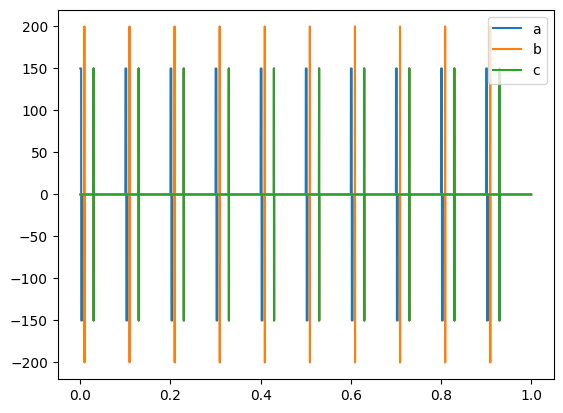

In [137]:

plt.plot(t,sig.T)
plt.legend(['a','b','c'])
plt.show()

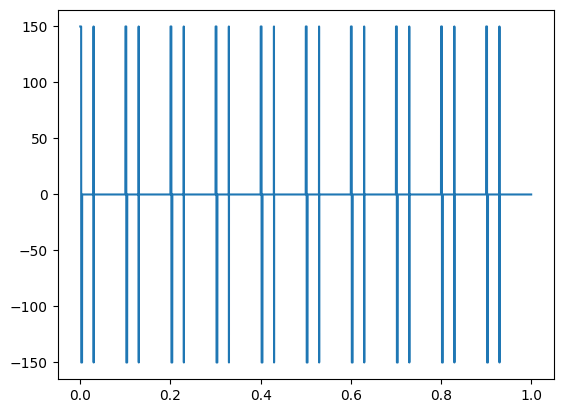

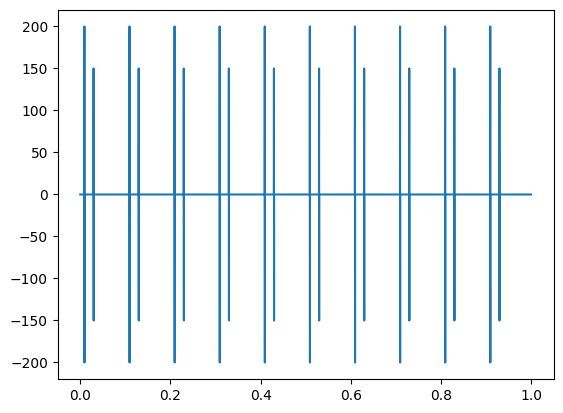

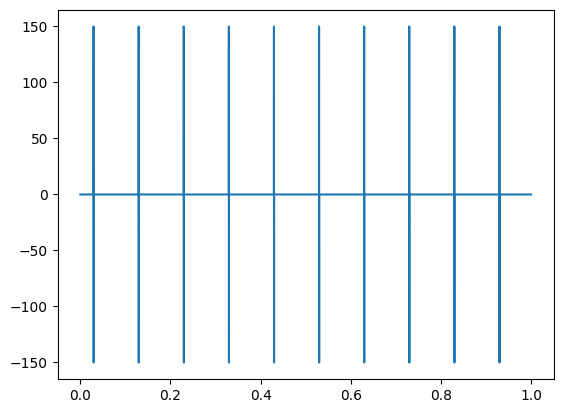

In [138]:
for i in range(3):
    plt.plot(t,sig[i])
    plt.show()

In [94]:
stim_list*5

[]

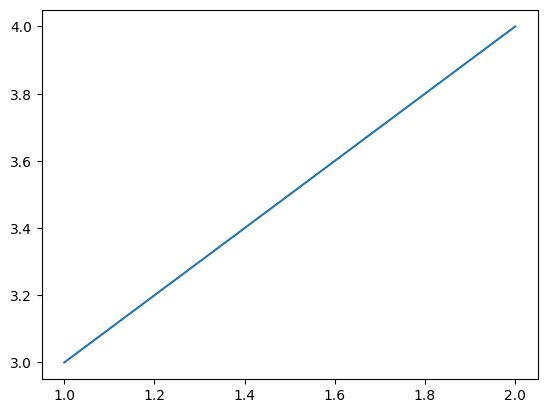

In [95]:
plt.plot([1,2],[3,4])
plt.show()

In [36]:
a = (1,3,2)
b,c, d = a

b,*c = a
print(b,c)

1 [3, 2]


In [37]:
b

1

In [ ]:
#!python -m pip install --force-reinstall git+https://github.com/braingeneers/braingeneerspy.git#egg=braingeneerspy[iot,analysis,data]


In [39]:
#lats = sd.latencies(sd.train)

# Previous

## Make Raster Plot

<font color="blue">plot_raster</font> plots the entire spike raster (spike train) for a given dataset. It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package.

In [40]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()

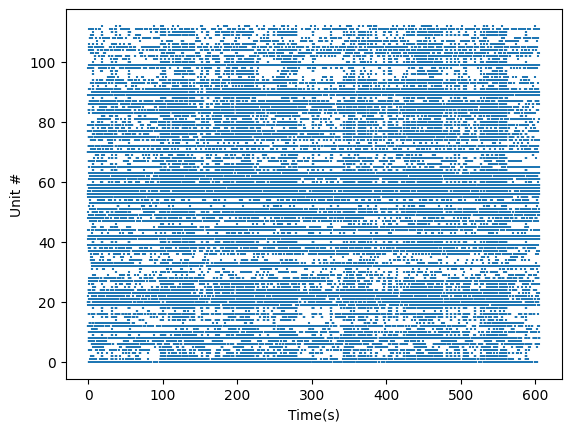

In [41]:
plot_raster(sd)

## Analyze Raster Plot

<font color="blue">raster_analysis</font> plots the first $x$ amount of seconds of the spike raster ($x$=20 by default). The plot also include a red moving average linge of the firing rate over a short window. The is useful for determining how much neural activity is occuring during short windows of time.

In [62]:
def raster_analysis(sd, seconds=40):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()

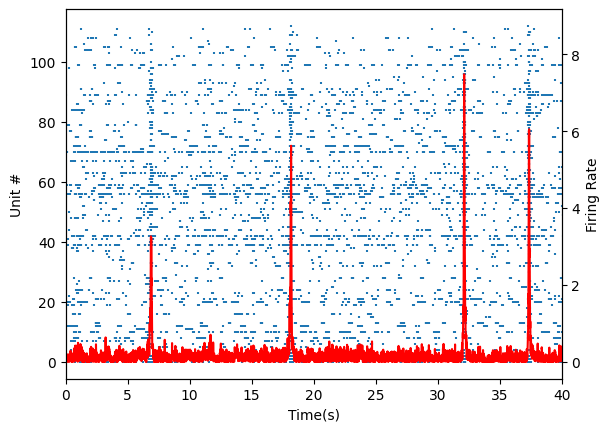

In [63]:
raster_analysis(sd)

## Interspike interval 

<font color="blue">interspike</font> computes the interspike interval across all neurons. It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package. Intervals between spikes greater than 100ms are ignored, becuase such intervals are not likely to represent a form of periodic behavior. 

In [46]:
def interspike(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    # Plot the isi's
    plt.xlim(0,100)
    plt.hist(isis, bins=50)
    plt.xlabel('Time bin(ms)')
    plt.ylabel('ISI count')
    plt.show()

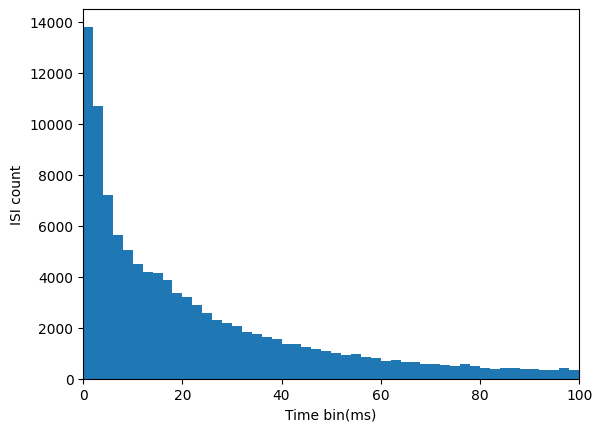

In [48]:
interspike(sd)

## Correlation Matrix

<font color="blue">correlation</font> computes the correlation matrix.  It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package.

In [49]:
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    sigma = 5                            # Blur it
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
    corr=np.corrcoef( dense_raster )
    
    plt.imshow(corr)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.show() 
        

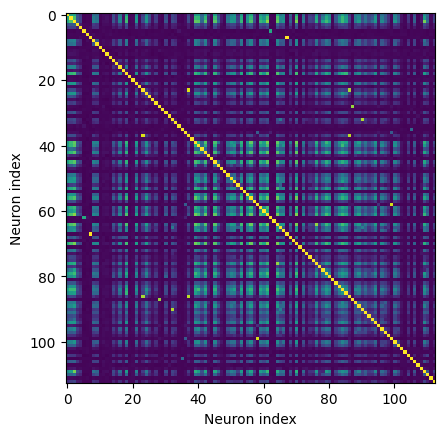

In [50]:
correlation(sd)